In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

#### __1. Read The CSV File__

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col = "date", parse_dates=['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### __2. Clean The Data__
Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [3]:
df_sorted = df["value"].sort_values()
df_sorted = df_sorted.iloc[round(df.shape[0]*2.5/100):round(df.shape[0]*97.5/100)+1]
df = df.loc[df_sorted.index].sort_values(by = "date")

In [4]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### __3. Plotting The Data__

#### __-Line Plot-__
Create a __draw_line_plot__ function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be _"Daily freeCodeCamp Forum Page Views 5/2016-12/2019"_. The label on the x axis should be ___Date___ and the label on the y axis should be ___Page Views___.

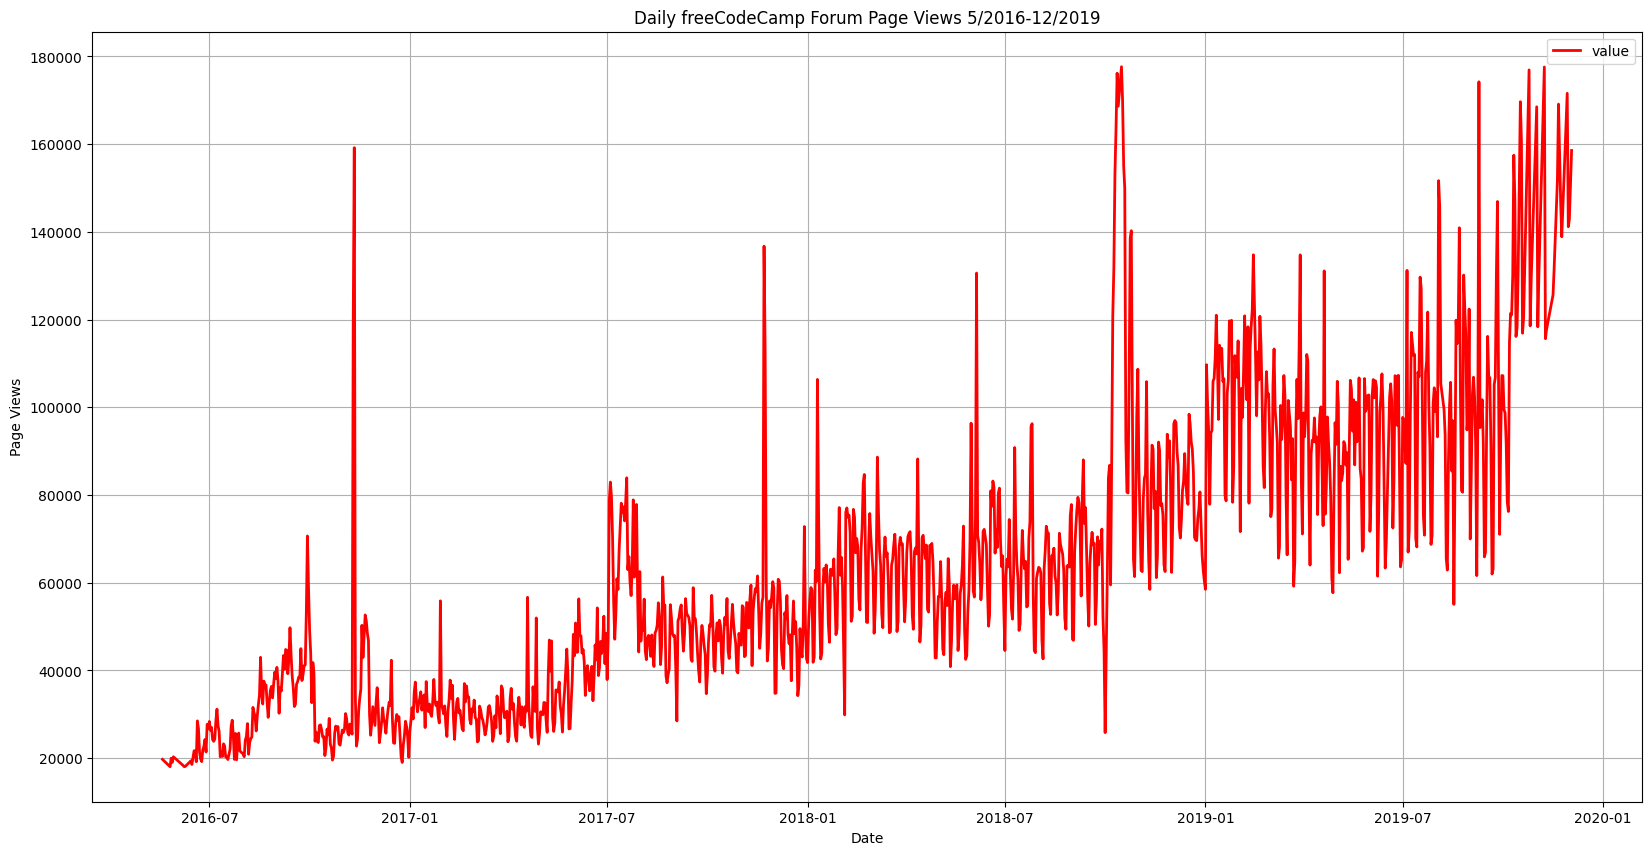

In [23]:
fig = plt.figure(figsize=(20, 10))
plt.plot(df.index, 'value', data=df, color='red', linestyle='solid', linewidth=2, markersize=1)
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.legend()
plt.grid(True)
fig.savefig('line_plot.png')
plt.show()

#### __-Bar Plot-__
Create a __draw_bar_plot__ function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [6]:
df['year'] = df.index.year
df['month'] = df.index.month

In [19]:
df_grouped = df.groupby(['year', 'month'])['value'].mean().unstack()

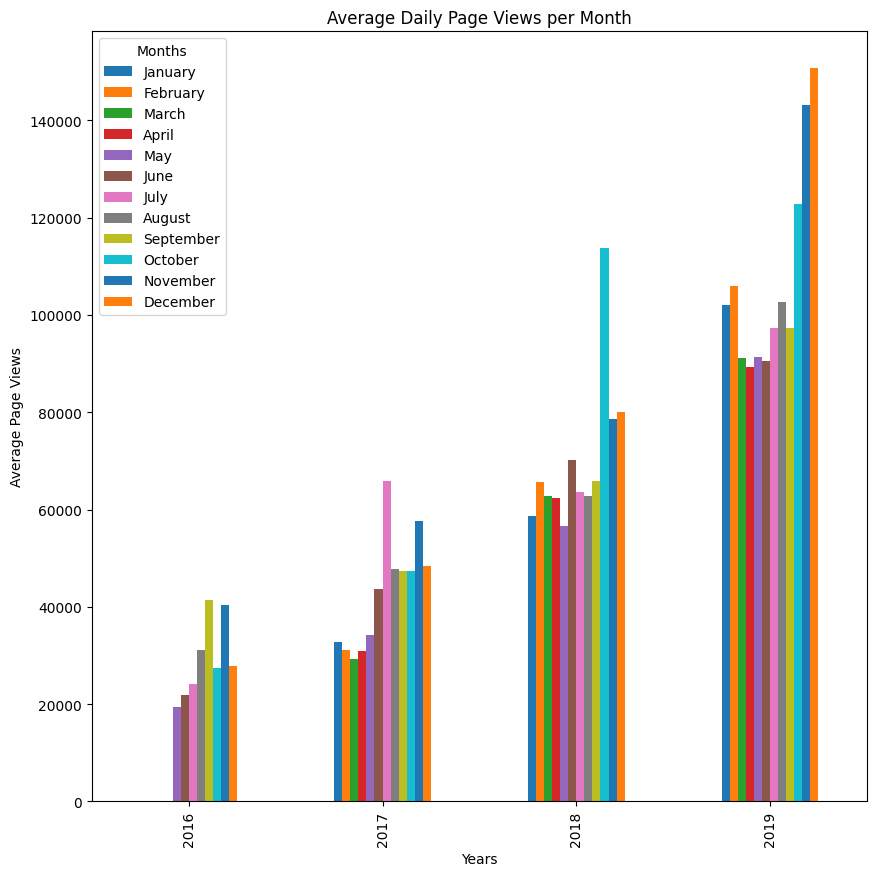

In [22]:
fig2 = df_grouped.plot(kind='bar', figsize=(10, 10))
fig2.set_xlabel("Years")
fig2.set_ylabel("Average Page Views")
fig2.set_title("Average Daily Page Views per Month")
fig2.legend(title='Months', labels=['January', 'February', 'March', "April", "May", "June", "July", "August", "September", "October", "November", "December"])
fig2.get_figure().savefig('bar_plot.png')

#### __-Box Plot-__
Create a __draw_box_plot__ function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

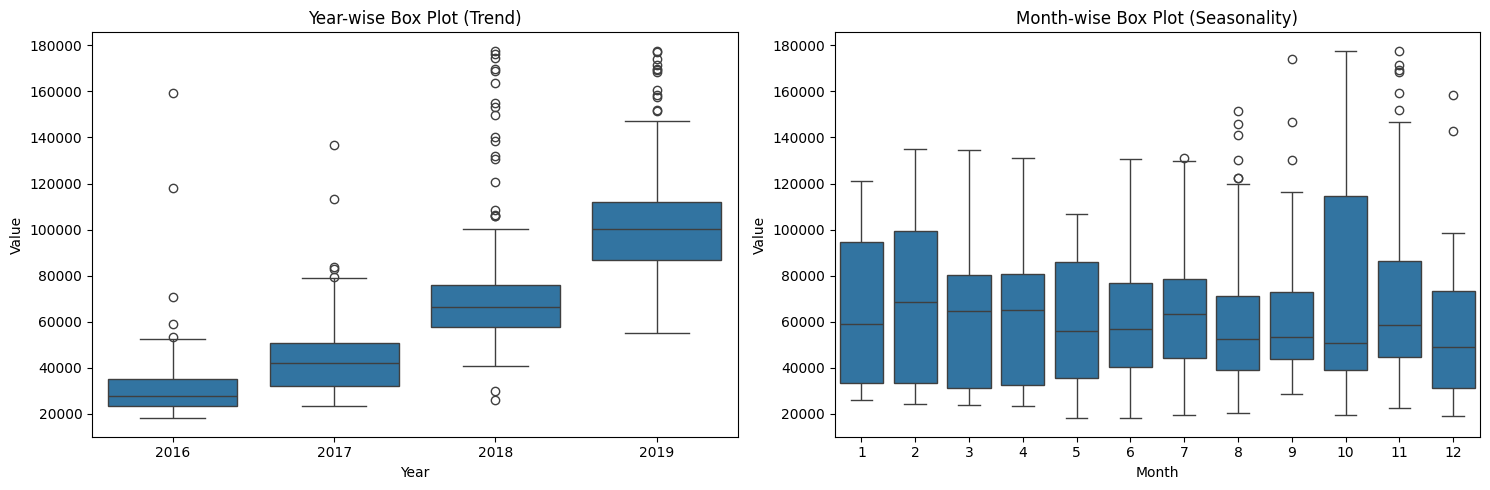

In [25]:
# Create subplots with 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# First box plot: Year-wise
sns.boxplot(x='year', y='value', data=df, ax=ax[0])
ax[0].set_title("Year-wise Box Plot (Trend)")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Value")

# Second box plot: Month-wise
sns.boxplot(x='month', y='value', data=df, ax=ax[1])
ax[1].set_title("Month-wise Box Plot (Seasonality)")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Value")

# Adjust layout and show plot
plt.tight_layout()
plt.show()